Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   C

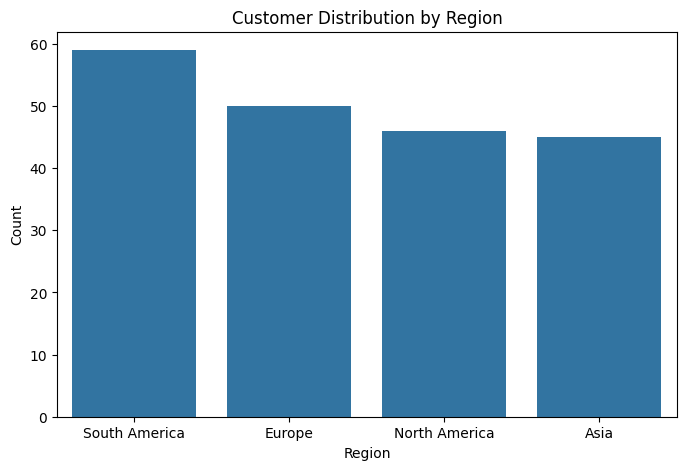

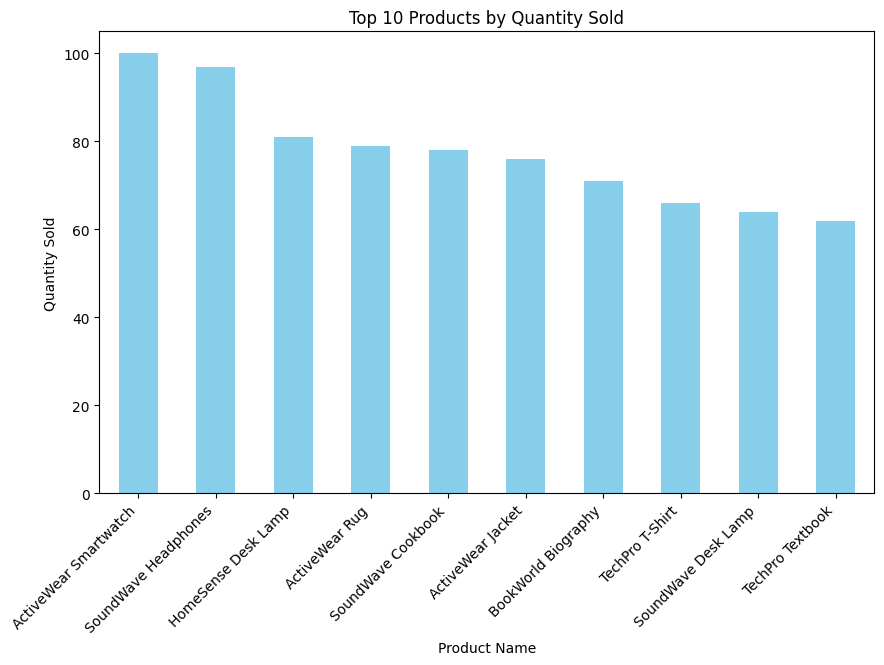

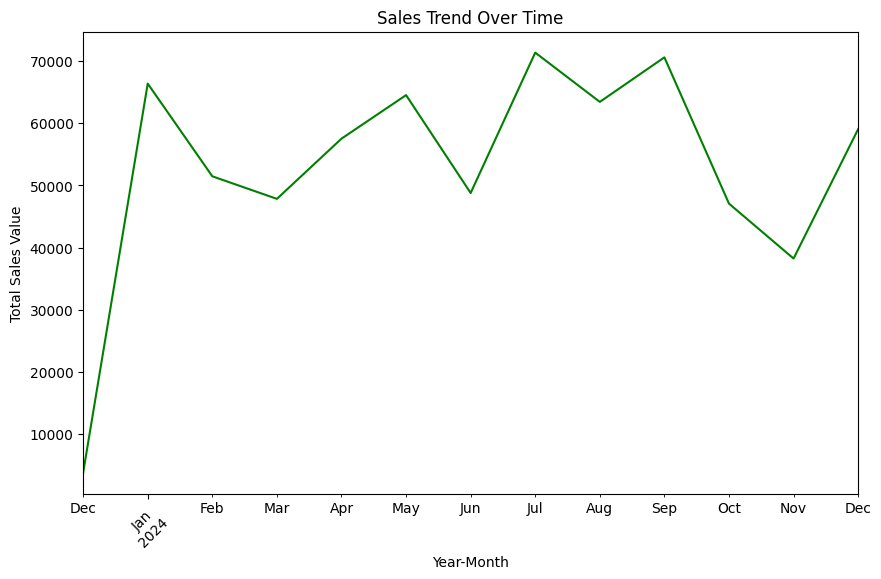

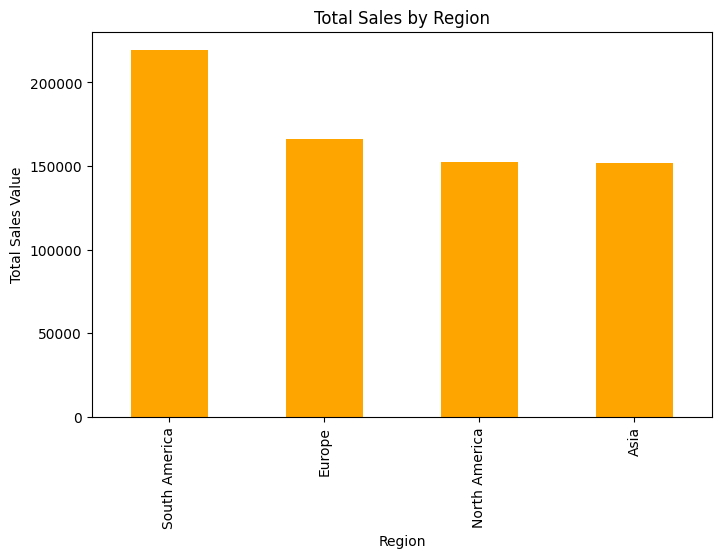

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display basic info about datasets
print("Customers Dataset Info:")
print(customers.info())
print("\nProducts Dataset Info:")
print(products.info())
print("\nTransactions Dataset Info:")
print(transactions.info())

# Check for missing values
print("\nMissing Values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())

# Convert columns to appropriate data types
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Descriptive statistics
print("\nDescriptive Statistics for Transactions:")
print(transactions.describe())

# Join datasets for better analysis
merged_data = pd.merge(transactions, customers, on="CustomerID", how="inner")
merged_data = pd.merge(merged_data, products, on="ProductID", how="inner")

# Top 5 rows of merged data
print("\nMerged Data Preview:")
print(merged_data.head())

# Visualizations
# 1. Distribution of customers by region
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x="Region", order=customers['Region'].value_counts().index)
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

# 2. Top 10 products by sales quantity
top_products = merged_data.groupby("ProductName")['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Product Name")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45, ha="right")
plt.show()

# 3. Sales trends over time
merged_data['YearMonth'] = merged_data['TransactionDate'].dt.to_period('M')
sales_trend = merged_data.groupby('YearMonth')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
sales_trend.plot(color='green')
plt.title("Sales Trend Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales Value")
plt.xticks(rotation=45)
plt.show()

# 4. Sales distribution by region
region_sales = merged_data.groupby("Region")['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
region_sales.plot(kind='bar', color='orange')
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales Value")
plt.show()

# Save cleaned data for further tasks
merged_data.to_csv("Cleaned_Data.csv", index=False)